# Doctor's Consultation Fee Prediction

### Machine learning Applied: Doctors Consultation Fees Prediction

### Introduction:
>We have all been in situations where we went to a doctor when we’re feeling unwell and after finding out the consultation fee, we think that it would have been much better to just have waited out the illness. To overcome such a problem whatif there is a analysis done basis on the clinic/hospital and Doctor's experience and rating given by his clients for predicting the Consultancy Fee of the Doctor. The below study is such that will help us to understand basis on the facts we have lets understand and predict the Consultancy fee of the Doctor. 


#### FEATURES:

1. Qualification: Qualification and degrees held by the doctor

2. Experience: Experience of the doctor in number of years

3. Rating: Rating given by patients

4. Profile: Type of the doctor

5. Miscellaeous_Info: Extra information about the doctor

6. Fees: Fees charged by the doctor

7. Place: Area and the city where the doctor is located.


###### We will start or analysis in importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

lets import our data and see what we have.

### EDA

In [2]:
df = pd.read_excel("Final_train.xlsx")

In [3]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


Lets try in understanding our data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Before filling the null values lets Remove the not required information from the data so we can understand better from the data.

In [6]:
df.Experience.unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [7]:
len(df.Experience.unique())

64

In [8]:
df.Experience = df.Experience.str.split()
df.Experience

0       [24, years, experience]
1       [12, years, experience]
2        [9, years, experience]
3       [12, years, experience]
4       [20, years, experience]
                 ...           
5956    [19, years, experience]
5957    [33, years, experience]
5958    [41, years, experience]
5959    [15, years, experience]
5960    [17, years, experience]
Name: Experience, Length: 5961, dtype: object

In [9]:
df.Experience = df.Experience.str[0].astype("int")
df.Experience

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: int32

we have cleansed Experience data i.e we have removed unwanted data lets follow the same with Qualification data also.

In [10]:
df["Qualification"]=df["Qualification"].str.split(",")
df["Qual1"]= df["Qualification"].str[0]
df["Qual2"]= df["Qualification"].str[1]


In [11]:
import re
df['Qual2'] = df['Qual2'].apply(lambda x: re.sub(' +','',str(x)))

In [12]:
df.Qual1.unique()

array(['BHMS', 'BAMS', 'MBBS', 'BSc - Zoology', 'BDS', 'BSc', 'MDS',
       'Diploma in Dermatology', 'DM - Neurology', 'MD - Homeopathy',
       'MDS - Prosthodontist And Crown Bridge',
       'MDS - Oral & Maxillofacial Surgery',
       'MDS - Periodontology and Oral Implantology', 'MD - Dermatology',
       'MDS-Oral Pathology and Oral Microbiology', 'MD - Dermatology ',
       'Get inspired by remarkable stories of people like you',
       'PhD - Orthodontics & Dentofacial Orthopaedics', 'MRCPS',
       'MDS - Conservative Dentistry & Endodontics',
       'MD - Ayurveda Medicine', 'MS - General Surgery', 'DDVL',
       'MD - General Medicine',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)', 'MS - ENT',
       'MD - Internal Medicine', 'GCEH', 'MS - Otorhinolaryngology',
       'Post Graduate Diploma in Healthcare Management(PGDHM)',
       'DNB - Paediatrics', 'Certification in Aesthetic Dentistry',
       'Fellowship In Laryngology Bronchoesophagology', 'FAGE',
      

In [13]:
df.Qual2.unique()

array(['MD-Homeopathy', 'MD-AyurvedaMedicine', 'MS-Otorhinolaryngology',
       'BAMS', 'nan', 'MD-GeneralMedicine', 'BDS', 'MS', 'MDS',
       'MDS-Oral&MaxillofacialSurgery',
       'DiplomainOtorhinolaryngology(DLO)', 'MF-Homeopathy', 'MS-ENT',
       'DNB', 'DNB-ENT', 'FellowshipofCollegeofGeneralPractice(FCGP)',
       'DDVL', 'IBCLC(USA)', 'MBBS', 'MD-Pediatrics',
       'DiplomainCosmetology', 'AFIH', 'MDS-ProsthodontistAndCrownBridge',
       'M.D.Hom.(PracticeofMedicine)', 'DiplomainEmergencyMedicine',
       'DHMS(DiplomainHomeopathicMedicineandSurgery)', 'MD-Dermatology',
       'MDS-OralandMaxillofacialPathology',
       'MemberoftheRoyalCollegeofPhysicians', 'MS-Psychology',
       'DiplomaInSkinAesthetics', 'CertificateinCosmeticDentistry',
       'MD-Rheumatology', 'MDS-PaedodonticsAndPreventiveDentistry', 'DDV',
       'MDS-ConservativeDentistry&Endodontics', 'Venereology&Leprosy',
       'PostGraduateDiplomainEmergencyServices(PGDEMS)', 'MD-Acupuncture',
       'MDS-Pe

we have 1420 unique vaules lets try splitting out only the most repeated Qualification

In [14]:
DQ1=pd.DataFrame(df.Qual1.value_counts())
DQ1=DQ1.head(15)
DQ1.rename(columns={"Qual1":"Qual"}, inplace = True)
DQ2=pd.DataFrame(df.Qual2.value_counts())
DQ2=DQ2.head(15)
DQ2.rename(columns={"Qual2":"Qual"}, inplace = True)
DQ= pd.concat([DQ1,DQ2])


In [15]:
DQ.sort_values(by="Qual", ascending=False, inplace = True)

In [16]:
DQ = DQ.head(20)
DQ

,Qual
MBBS,2448
nan,1962
BDS,1208
BAMS,711
BHMS,706
MD-Dermatology,422
MS-ENT,301
MD-GeneralMedicine,251
MBBS,217
DiplomainOtorhinolaryngology(DLO),194


In [17]:
imp_Qual = []
for i in DQ.index.values:
    imp_Qual.append(i)
imp_Qual.remove("nan")  
imp_Qual

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD-Dermatology',
 'MS-ENT',
 'MD-GeneralMedicine',
 'MBBS',
 'DiplomainOtorhinolaryngology(DLO)',
 'BDS',
 'DDVL',
 'MD-Homeopathy',
 'DDV',
 'MD-AyurvedaMedicine',
 'Venereology&Leprosy',
 'MD - Dermatology ',
 'MDS-ConservativeDentistry&Endodontics',
 'MDS-Oral&MaxillofacialSurgery',
 'MS-Otorhinolaryngology']

So We have filtered top 20 most repeated Qualification names lets fill these values that maches with our Data.

In [18]:
for a in imp_Qual:
    df[a] = 0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for b in x:
        b = b.strip()
        if b in imp_Qual:
            df[b][y] = 1

In [19]:
df.drop(['Qualification','Qual1',"Qual2"],axis=1,inplace=True)

In [20]:
df

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,...,DiplomainOtorhinolaryngology(DLO),DDVL,MD-Homeopathy,DDV,MD-AyurvedaMedicine,Venereology&Leprosy,MD - Dermatology,MDS-ConservativeDentistry&Endodontics,MDS-Oral&MaxillofacialSurgery,MS-Otorhinolaryngology
0,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5957,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5958,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5959,15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have removed the orginal Qualification Data and fitted new qualification data.

We are cleaning "Rating" and "Place" as like before

In [21]:
df.Rating = df.Rating.str.split("%")
df.Rating = df.Rating.str[0].astype("float")
df.Rating

0       100.0
1        98.0
2         NaN
3         NaN
4       100.0
        ...  
5956     98.0
5957      NaN
5958     97.0
5959     90.0
5960    100.0
Name: Rating, Length: 5961, dtype: float64

In [22]:
df.Place = df.Place.str.split(",")
Area= [i for i in df.Place.str[0]]
City= [i for i in df.Place.str[1]]

In [23]:
df_Place = pd.DataFrame({"Area": Area, "City": City})
df_Place

,Area,City
0,Kakkanad,Ernakulam
1,Whitefield,Bangalore
2,Mathikere - BEL,Bangalore
3,Bannerghatta Road,Bangalore
4,Keelkattalai,Chennai
...,...,...
5956,Basavanagudi,Bangalore
5957,Nungambakkam,Chennai
5958,Greater Kailash Part 2,Delhi
5959,Vileparle West,Mumbai


In [24]:
df=df.join(df_Place)

We are droping "Place" column

In [25]:
df.drop("Place", axis = 1, inplace = True)
df

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD-Dermatology,...,MD-Homeopathy,DDV,MD-AyurvedaMedicine,Venereology&Leprosy,MD - Dermatology,MDS-ConservativeDentistry&Endodontics,MDS-Oral&MaxillofacialSurgery,MS-Otorhinolaryngology,Area,City
0,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Kakkanad,Ernakulam
1,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Whitefield,Bangalore
2,9,NaN,ENT Specialist,NaN,300,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Mathikere - BEL,Bangalore
3,12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Bannerghatta Road,Bangalore
4,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,98.0,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Basavanagudi,Bangalore
5957,33,NaN,General Medicine,NaN,100,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Nungambakkam,Chennai
5958,41,97.0,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Greater Kailash Part 2,Delhi
5959,15,90.0,General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Vileparle West,Mumbai


#### lets fill NaN Values in the Data

In [26]:
df.isnull().sum()

Experience                                  0
Rating                                   3302
Profile                                     0
Miscellaneous_Info                       2620
Fees                                        0
MBBS                                        0
BDS                                         0
BAMS                                        0
BHMS                                        0
MD-Dermatology                              0
MS-ENT                                      0
MD-GeneralMedicine                          0
DiplomainOtorhinolaryngology(DLO)           0
DDVL                                        0
MD-Homeopathy                               0
DDV                                         0
MD-AyurvedaMedicine                         0
Venereology&Leprosy                         0
MD - Dermatology                            0
MDS-ConservativeDentistry&Endodontics       0
MDS-Oral&MaxillofacialSurgery               0
MS-Otorhinolaryngology            

### Key observation:
    We have 4 Colums of missing Data Lets try in filling the missing data

In [27]:
df['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'],
      dtype=object)

#### Key observation:
 >We will fill nan values in the Area and City with "Wakanda" to continue our analysis

In [28]:
df['City'].replace(np.nan,"Wakanda", inplace = True) #Wakanda is no place on Earth

In [29]:
df['Area'].fillna("Wakanda", inplace = True)

In [30]:
df.City.value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Wakanda                  26
 Sector 5                 1
Name: City, dtype: int64

In [31]:
df.loc[df.City==" Sector 5"]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD-Dermatology,...,MD-Homeopathy,DDV,MD-AyurvedaMedicine,Venereology&Leprosy,MD - Dermatology,MDS-ConservativeDentistry&Endodontics,MDS-Oral&MaxillofacialSurgery,MS-Otorhinolaryngology,Area,City
2169,11,NaN,Dentist,NaN,250,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Dwarka,Sector 5


In [32]:
df.City.replace(" Sector 5"," Delhi", inplace = True )# Since Sector 5  Area Dwarka is in Delhi we are replacing the same

In [33]:
df.isnull().sum()

Experience                                  0
Rating                                   3302
Profile                                     0
Miscellaneous_Info                       2620
Fees                                        0
MBBS                                        0
BDS                                         0
BAMS                                        0
BHMS                                        0
MD-Dermatology                              0
MS-ENT                                      0
MD-GeneralMedicine                          0
DiplomainOtorhinolaryngology(DLO)           0
DDVL                                        0
MD-Homeopathy                               0
DDV                                         0
MD-AyurvedaMedicine                         0
Venereology&Leprosy                         0
MD - Dermatology                            0
MDS-ConservativeDentistry&Endodontics       0
MDS-Oral&MaxillofacialSurgery               0
MS-Otorhinolaryngology            

We have only two column with NaN Values lets split the data and fill the NaN values

In [34]:
df.Rating.fillna(-1,inplace = True) 

Logicall if there is no Ratings we can Consider it as Zero Ratings but there are chances we might have missed the real Rating data so we are replacing NaN in Ratings with -1 and we will change the rating data between 0 - 10

In [35]:
df["Rating"] = pd.cut(df["Rating"],bins=[-1,0,10,20,30,40,50,60,70,80,90,100],
                      labels=[0,1,2,3,4,5,6,7,8,9,10],include_lowest=True)

In [36]:
df["Rating"].unique()

[10, 0, 8, 9, 4, 6, 7, 5, 1]
Categories (9, int64): [0 < 1 < 4 < 5 ... 7 < 8 < 9 < 10]

Now we have only Miscellaneous_Info which has nan values from the name we can understand its Miscellaneous and has nearly 50% of data missing or customer feedbacck missing so we will drop the column.

In [37]:
df

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD-Dermatology,...,MD-Homeopathy,DDV,MD-AyurvedaMedicine,Venereology&Leprosy,MD - Dermatology,MDS-ConservativeDentistry&Endodontics,MDS-Oral&MaxillofacialSurgery,MS-Otorhinolaryngology,Area,City
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Kakkanad,Ernakulam
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Whitefield,Bangalore
2,9,0,ENT Specialist,NaN,300,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Mathikere - BEL,Bangalore
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Bannerghatta Road,Bangalore
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Basavanagudi,Bangalore
5957,33,0,General Medicine,NaN,100,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Nungambakkam,Chennai
5958,41,10,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Greater Kailash Part 2,Delhi
5959,15,9,General Medicine,General Medical Consultation Viral Fever Treat...,100,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Vileparle West,Mumbai


In [38]:
df.drop("Miscellaneous_Info",axis = 1, inplace = True)

In [39]:
df.isnull().sum()

Experience                               0
Rating                                   0
Profile                                  0
Fees                                     0
MBBS                                     0
BDS                                      0
BAMS                                     0
BHMS                                     0
MD-Dermatology                           0
MS-ENT                                   0
MD-GeneralMedicine                       0
DiplomainOtorhinolaryngology(DLO)        0
DDVL                                     0
MD-Homeopathy                            0
DDV                                      0
MD-AyurvedaMedicine                      0
Venereology&Leprosy                      0
MD - Dermatology                         0
MDS-ConservativeDentistry&Endodontics    0
MDS-Oral&MaxillofacialSurgery            0
MS-Otorhinolaryngology                   0
Area                                     0
City                                     0
dtype: int6

We have cleared all the NaN values

### Univariate Analysis:

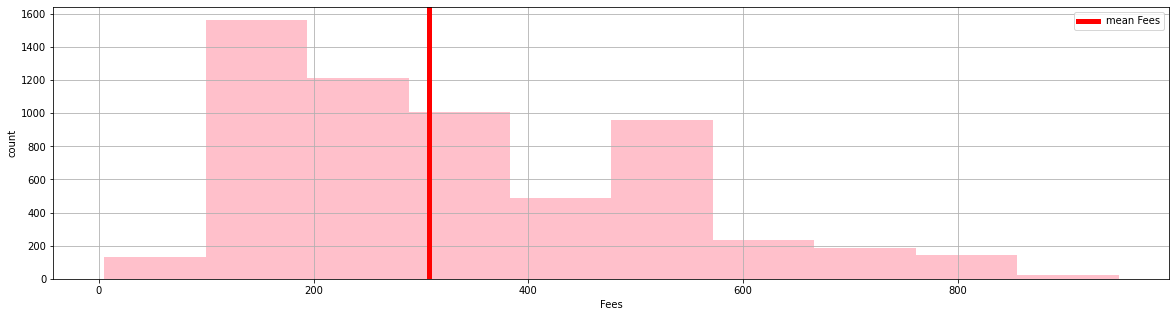

In [40]:
Fees = df.Fees.hist(bins =10,figsize=(20,5), color ="pink")

plt.axvline(np.mean(df.Fees), linewidth = 5, color = "red", label = "mean Fees")
plt.xlabel("Fees")
plt.ylabel("count")
plt.legend()
plt.show()

From above we can understand that the most of the doctors charge fees between Rs: 100 - Rs: 200 and highest is Rs: 950 least is Rs 5 average is ~Rs:300


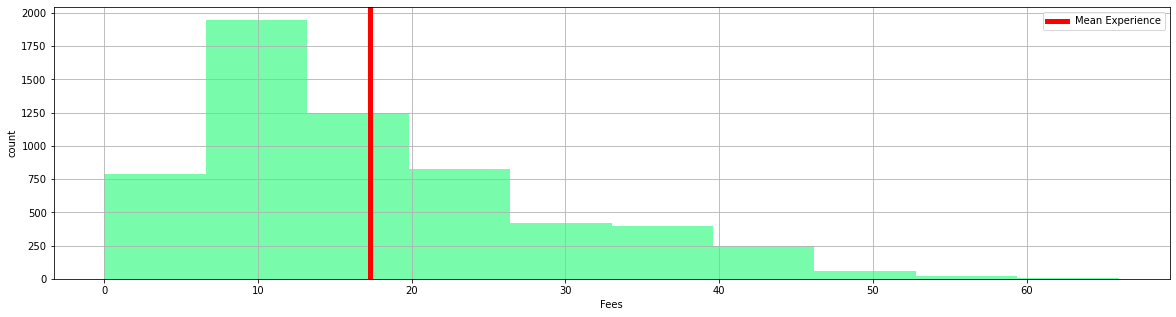

In [41]:
df.Experience.hist(bins =10,figsize=(20,5), color ="#78fcac")

plt.axvline(np.mean(df.Experience), linewidth = 5, color = "red", label = "Mean Experience")
plt.xlabel("Fees")
plt.ylabel("count")
plt.legend()
plt.show()

From above we can understand that the most of the doctors have around 10 years of exeprience to the max of 66 years

### Multivariate Analysis:

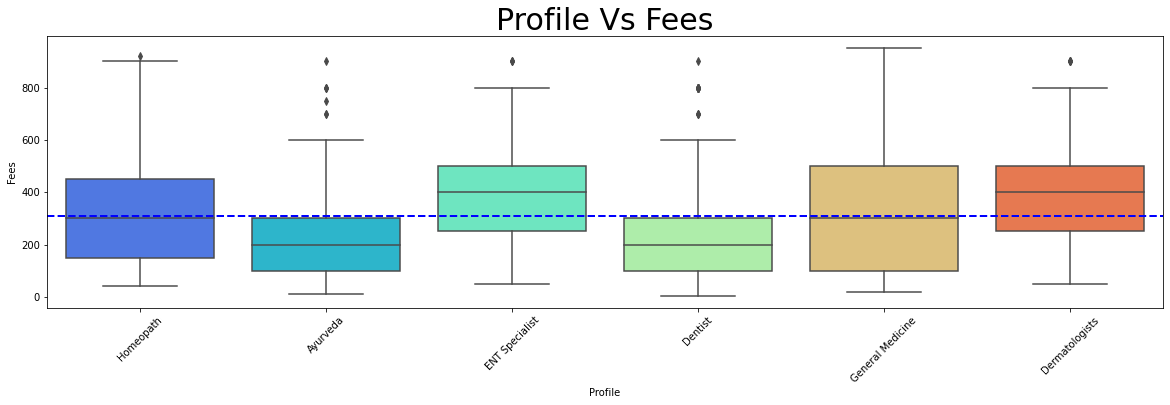

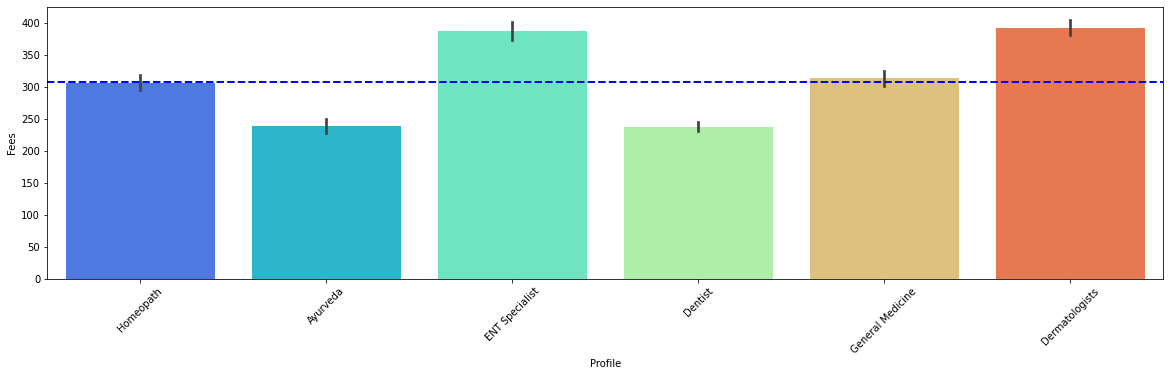

In [42]:
plt.figure(figsize=(20,5))
mean_Fees = np.mean(df['Fees'])
sns.boxplot(x = "Profile",y = "Fees", data = df, palette = "rainbow")
plt.axhline(mean_Fees, color = "b", linestyle="dashed", linewidth=2)
plt.title("Profile Vs Fees", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "Profile",y = "Fees", data = df, palette = "rainbow")
plt.axhline(mean_Fees, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

##### Key observation:
1. ENT specialist and Dermatologists median is more the mean of the over all Fees which is more than 50th percentile of the ENT specialist and Dermatologists are getting above average salary.
2. General medicine is Profile that gets highest Fees.
3. Dentist and Ayurveda profile atleast 75th Percentile of population gets Fees below mean. 

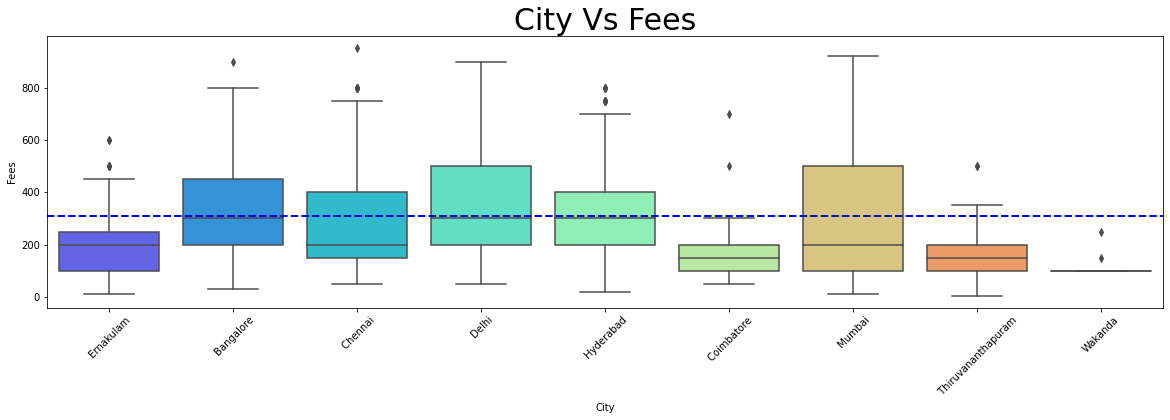

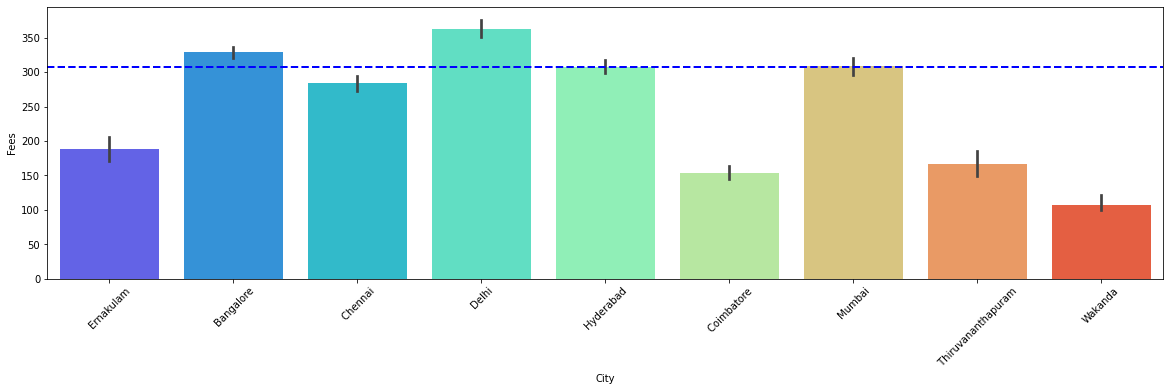

In [43]:
plt.figure(figsize=(20,5))
mean_Fees = np.mean(df['Fees'])
sns.boxplot(x = "City",y = "Fees", data = df, palette = "rainbow")
plt.axhline(mean_Fees, color = "b", linestyle="dashed", linewidth=2)
plt.title("City Vs Fees", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "City",y = "Fees", data = df, palette = "rainbow")
plt.axhline(mean_Fees, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()


##### Key observation:
1. Delhi, Banglore and Mumbai are the Top most city with highest fees.
2. Coimbatore 100% of population is below the mean.
3. In Mumbai we can see multiple variety of doctors who charge fees very low to very high.
4. And there is also a minimum contribution from Wakanda(not known value)  
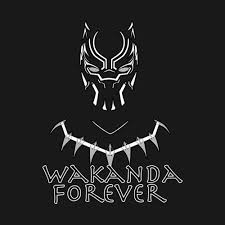

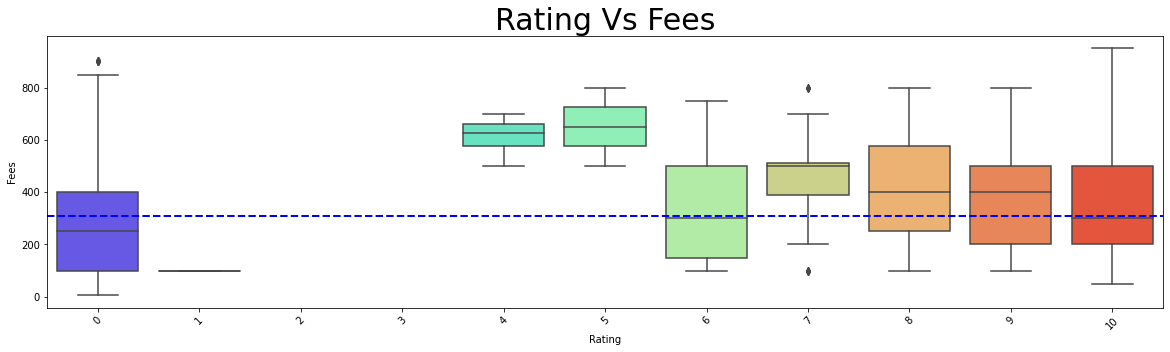

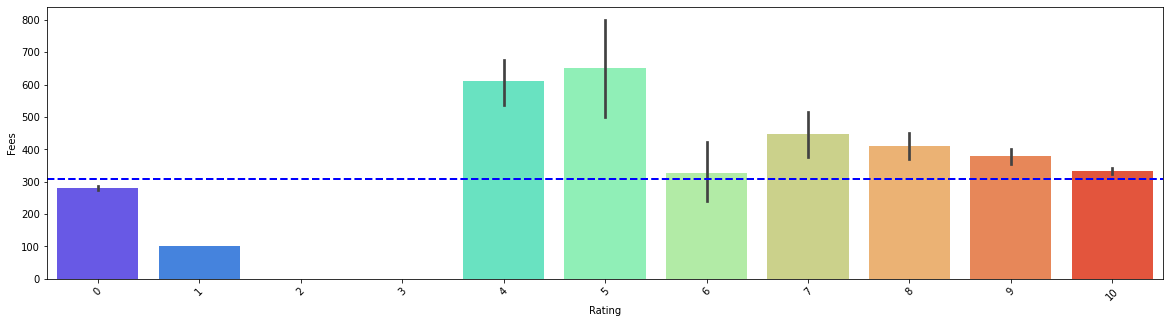

In [44]:
plt.figure(figsize=(20,5))
mean_Fees = np.mean(df['Fees'])
sns.boxplot(x = "Rating",y = "Fees", data = df, palette = "rainbow")
plt.axhline(mean_Fees, color = "b", linestyle="dashed", linewidth=2)
plt.title("Rating Vs Fees", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "Rating",y = "Fees", data = df, palette = "rainbow")
plt.axhline(mean_Fees, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()


##### Key observation:
1. Mediocre rated Doctors the total population charges above mean
2. The Doctors for whom there was no ratings more than 60% of population are charging lesser than the mean of Fees
3. And its is evident that rating 5 doctors charges more.    (i.e. RS : 950/- / Per consultancy)

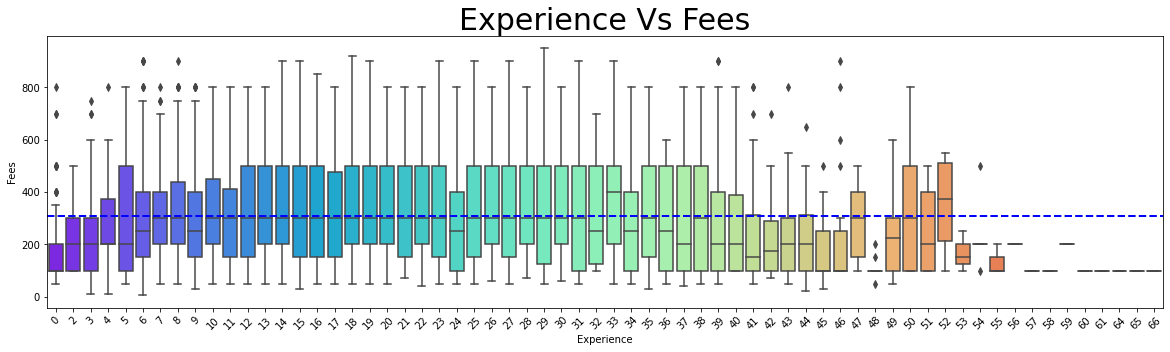

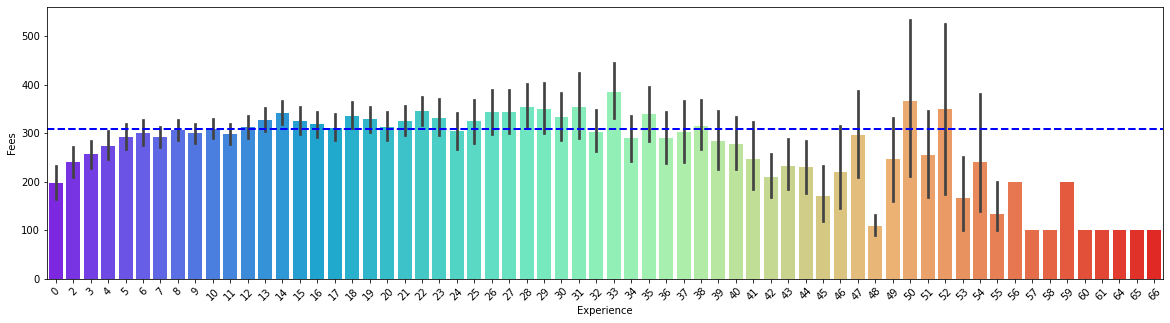

In [45]:
plt.figure(figsize=(20,5))
mean_Fees = np.mean(df['Fees'])
sns.boxplot(x = "Experience",y = "Fees", data = df, palette = "rainbow")
plt.axhline(mean_Fees, color = "b", linestyle="dashed", linewidth=2)
plt.title("Experience Vs Fees", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "Experience",y = "Fees", data = df, palette = "rainbow")
plt.axhline(mean_Fees, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()


##### Key observation:
1. Mediocre Experienced Doctors(10years - 50years) charges more.
2. As per our data the least Doctors are charging is Rs: 5/-. And in the above graph its evident that Doctors who have experience atleast above 55 year are charging less.




The Doctors who have experience more than 55 years might be of alteast of 70years to 90years of age and their charges are very less i.e Rs5/-. (5 Rupees Doctor). Which reminds me a news some-days before.....





>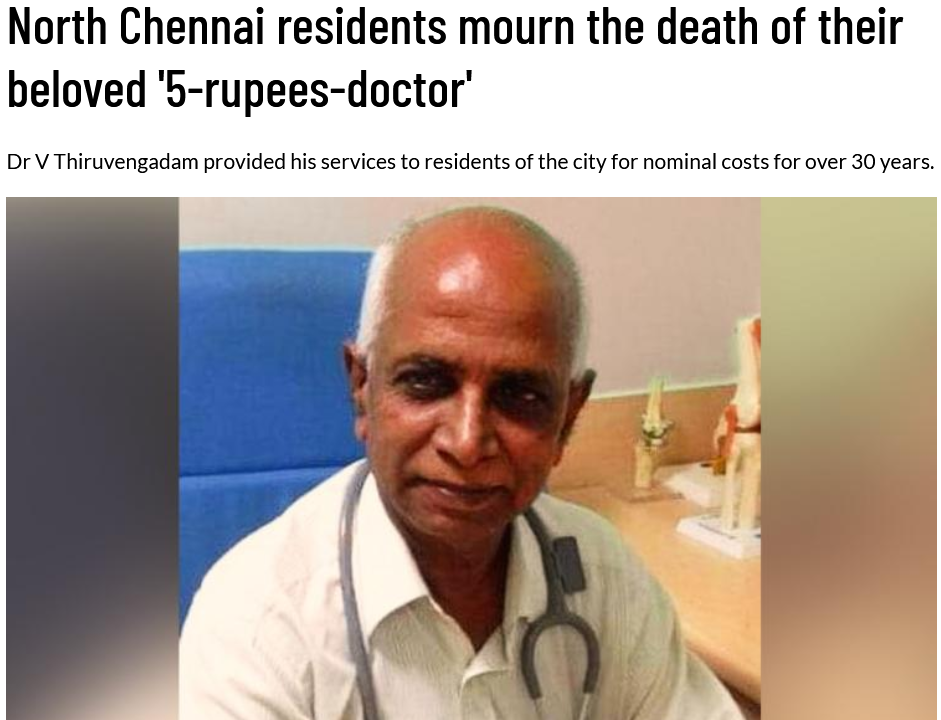
-News source | https://www.thenewsminute.com/article/north-chennai-residents-mourn-death-their-beloved-5-rupees-doctor-130867



>Many residents of North Chennai went into mourning in the confines of their homes on Saturday 15th of August, as news of the death of a 70-year-old year doctor from Vyasarpadi became public knowledge. Dr V Thiruvengadam, affectionately called the '5-rupees-doctor' by his patients, died of a cardiac arrest over 30 years after he began serving residents of the area.The doctor was well known in North Chennai for treating patients at their convenience, and began these services in 1973. He started off by taking Rs.5 from patients and over the years the amount grew to a very modest, Rs.50.  His family and patients say that he has never taken a day off and that it was only in March that he closed his clinic for the first time in over three decades due to the COVID-19 pandemic.

>"Despite his age, he would work the whole day and barely ever slept," says Dr. Preethi, his daughter who also assisted him in the clinic in Kalyanapuram. "He used to give patients his phone number and they could call him any time of the day. And if he couldn't physically make it to the clinic, he will guide the patients to the nearest pharmacy and tell the pharmacist what medicines have to be given," she adds.


>“Thank you so much for the difference you make in the lives of your patients! Your kindness, sincere caring, and concern make everything better and are a great encouragement.” “Thank you for you generosity '5-rupees-doctor'."


In [46]:
df = pd.get_dummies(df,columns=['City','Profile'], prefix=["C",'P'])

In [47]:
df

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD-Dermatology,MS-ENT,MD-GeneralMedicine,...,C_ Hyderabad,C_ Mumbai,C_ Thiruvananthapuram,C_Wakanda,P_Ayurveda,P_Dentist,P_Dermatologists,P_ENT Specialist,P_General Medicine,P_Homeopath
0,24,10,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,10,600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,9,100,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Encoding the non numeric data with lable encoder:

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_c= ["Area","Rating"]
for i in cat_c:
    df[i] = le.fit_transform(df[i])
    
df    

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD-Dermatology,MS-ENT,MD-GeneralMedicine,...,C_ Hyderabad,C_ Mumbai,C_ Thiruvananthapuram,C_Wakanda,P_Ayurveda,P_Dentist,P_Dermatologists,P_ENT Specialist,P_General Medicine,P_Homeopath
0,24,8,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,8,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,8,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,8,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,8,600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,7,100,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Key Observation:
We have converted all the catogorical values into Dummy Variable for better pridection and have encoded the Area.
we will not correct the skewness or outliers since we have the most is Dummy variable or else it will deform our data so we will proceed with the same data in training our model.

#### Target Variable:
>Lets see the correlation with the Fees only.

In [49]:
df.columns.values

array(['Experience', 'Rating', 'Fees', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD-Dermatology', 'MS-ENT', 'MD-GeneralMedicine',
       'DiplomainOtorhinolaryngology(DLO)', 'DDVL', 'MD-Homeopathy',
       'DDV', 'MD-AyurvedaMedicine', 'Venereology&Leprosy',
       'MD - Dermatology ', 'MDS-ConservativeDentistry&Endodontics',
       'MDS-Oral&MaxillofacialSurgery', 'MS-Otorhinolaryngology', 'Area',
       'C_ Bangalore', 'C_ Chennai', 'C_ Coimbatore', 'C_ Delhi',
       'C_ Ernakulam', 'C_ Hyderabad', 'C_ Mumbai',
       'C_ Thiruvananthapuram', 'C_Wakanda', 'P_Ayurveda', 'P_Dentist',
       'P_Dermatologists', 'P_ENT Specialist', 'P_General Medicine',
       'P_Homeopath'], dtype=object)

In [50]:
df

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD-Dermatology,MS-ENT,MD-GeneralMedicine,...,C_ Hyderabad,C_ Mumbai,C_ Thiruvananthapuram,C_Wakanda,P_Ayurveda,P_Dentist,P_Dermatologists,P_ENT Specialist,P_General Medicine,P_Homeopath
0,24,8,100,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,8,350,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,8,250,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,8,300,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,8,600,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,7,100,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


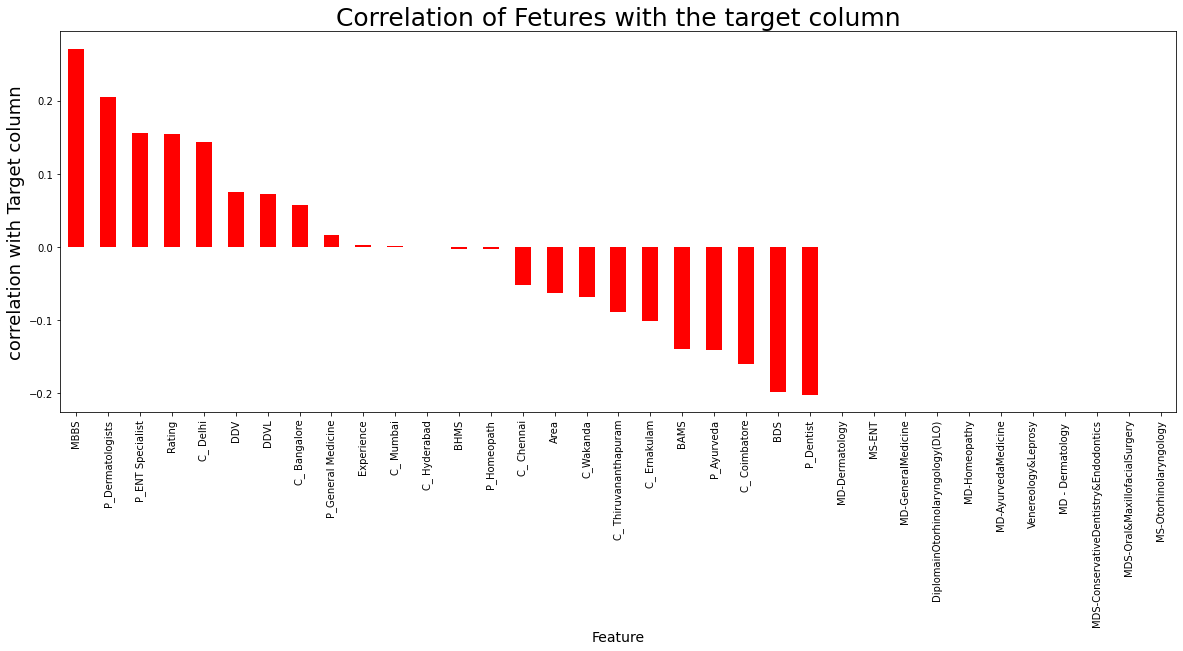

Key observation:
                                            Fees
MBBS                                   0.271038
P_Dermatologists                       0.204426
P_ENT Specialist                       0.155084
Rating                                 0.153630
C_ Delhi                               0.143421
DDV                                    0.075340
DDVL                                   0.071667
C_ Bangalore                           0.056616
P_General Medicine                     0.015463
Experience                             0.002117
C_ Mumbai                              0.000925
C_ Hyderabad                          -0.000997
BHMS                                  -0.002423
P_Homeopath                           -0.003072
C_ Chennai                            -0.052178
Area                                  -0.063459
C_Wakanda                             -0.069429
C_ Thiruvananthapuram                 -0.089157
C_ Ernakulam                          -0.101609
BAMS                  

In [51]:
plt.figure(figsize=(20,7))
df.corr()['Fees'].sort_values(ascending=False).drop(['Fees']).plot.bar(cmap = "prism")
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(df.corr()['Fees'].sort_values(ascending=False).drop(['Fees']))
print("Key observation:\n", cor)

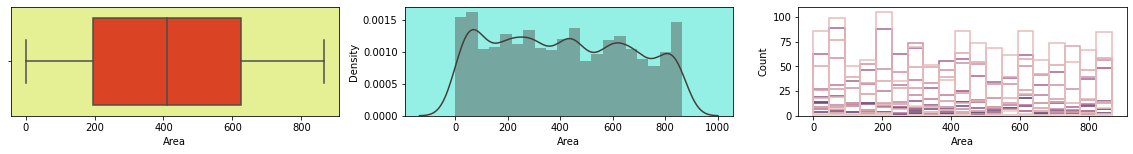

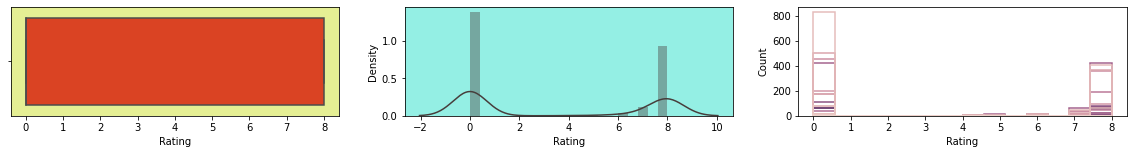

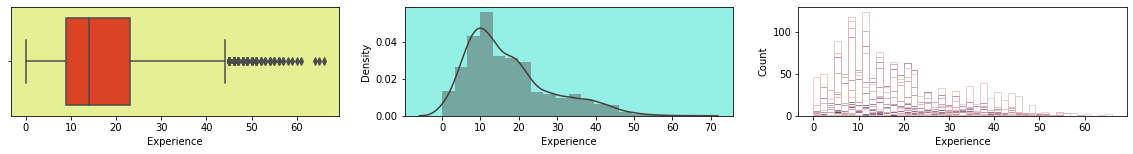

In [52]:
target_variable = 'Fees'
feature_variable = ['Area',"Rating", "Experience"]


def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 2))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color="#f82f04")
    a1.set_facecolor("#e5ef94")
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color="#473d3b")
    a2.set_facecolor("#94efe4")
    a3=sns.histplot(df, hue=target_variable, x=feature_name, log_scale=False, fill=False)
    a3.set_facecolor("w")
    a3.get_legend().remove()
    plt.show()
    
   
for i in feature_variable:
    num_plots(i) 

#### From above we can see how the data is distributes with the target variable in each Feature_variable we can see the where the highest fees is collected.

Lets split the data for Training.

In [53]:
x_1=df.drop(["Fees"], axis = 1)
y_1=df.Fees

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x_1)

### Selecting parameters for training

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 22.68324956890344 found on randomstate 267


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [57]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### Shortlisting the best model


In [58]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [59]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.1591112286170412

ERROR:
MEAN ABSOLUTE ERROR:  132.07803236021627
MEAN SQUARED ERROR:  28262.907498154116
ROOT MEAN SQUARED ERROR : 168.11575624596915
R2 SCORE:  0.2268324956890344
**********************************************************************************************************



Score of Lasso() is: 0.15871033694582892

ERROR:
MEAN ABSOLUTE ERROR:  132.56937136938427
MEAN SQUARED ERROR:  28338.948802587052
ROOT MEAN SQUARED ERROR : 168.341761908883
R2 SCORE:  0.22475228983700724
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.1591531219594512

ERROR:
MEAN ABSOLUTE ERROR:  132.09309309817425
MEAN SQUARED ERROR:  28252.43822730176
ROOT MEAN SQUARED ERROR : 168.08461627198892
R2 SCORE:  0.22711889580612787
**********************************************************************************************************



Score of ElasticNet() i

In [60]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(round(CV.mean()))
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.04633264 0.15845132 0.16552913 0.0858105  0.17452085]
MEAN OF SCORE is : 0.12612888758626348
Standard Deviation : 0.0508564915437137
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.18460787 0.15799947 0.18502149 0.14815348 0.1754842 ]
MEAN OF SCORE is : 0.17025330286126122
Standard Deviation : 0.014765322396171583
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.18352022 0.15869499 0.18430369 0.14580819 0.17428465]
MEAN OF SCORE is : 0.16932234745317562
Standard Deviation : 0.01494323116852505
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.17253312 0.15065872 0.1733524  0.14785549 0.16594781]
MEAN OF SC

In [61]:
myList = [round(x,2) for x in  mean_score]

Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": myList,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
0,LinearRegression,0.159111,0.0,0.050856,132.078032,28262.907498,168.115756,0.226832
1,Lasso,0.158710,0.0,0.014765,132.569371,28338.948803,168.341762,0.224752
2,Ridge,0.159153,0.0,0.014943,132.093093,28252.438227,168.084616,0.227119
3,ElasticNet,0.149143,0.0,0.010808,135.635125,29058.510174,170.465569,0.205068
4,SVR,0.084439,0.0,0.017308,140.712878,32813.936759,181.146175,0.102333
5,KNeighborsRegressor,0.368958,0.0,0.022809,133.636351,31894.191844,178.589451,0.127494
6,DecisionTreeRegressor,0.986073,-0.0,0.078086,168.199195,56222.790446,237.113455,-0.538045
7,AdaBoostRegressor,0.129569,0.0,0.015196,141.783011,29849.672226,172.770577,0.183425
8,RandomForestRegressor,0.872048,0.0,0.035231,128.097520,29131.518557,170.679579,0.203071


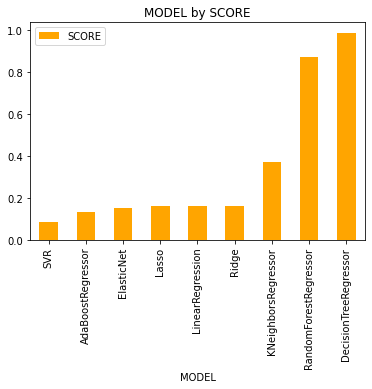

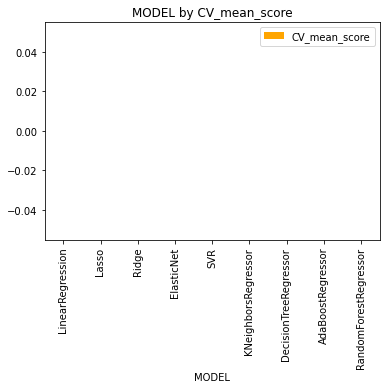

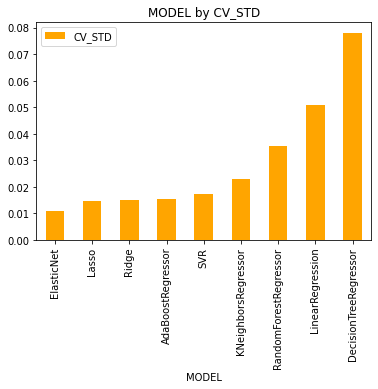

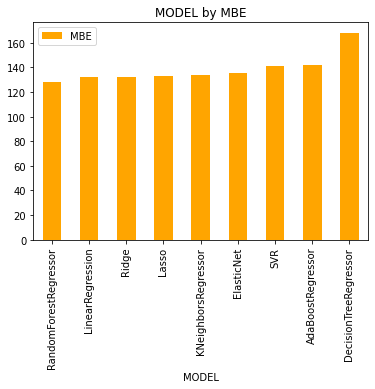

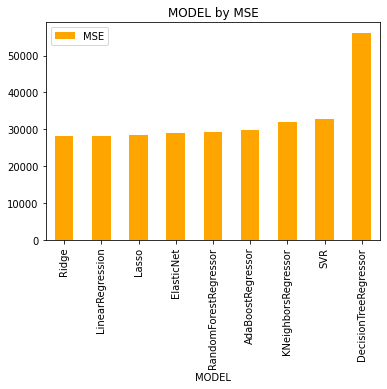

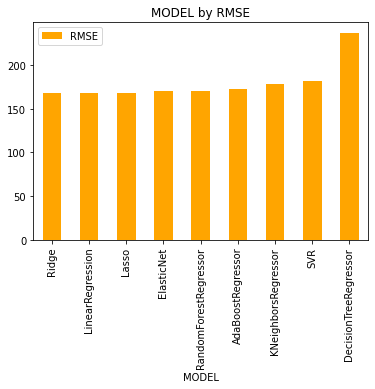

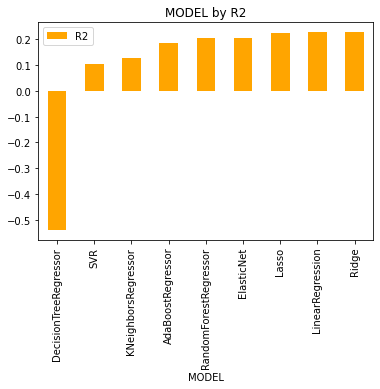

In [62]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()


From Above observation its is evident that Randomforest is the best model with Score of 0.87 lets try in Hyper tuning the same for improved performance.


In [63]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

311.36834494190873

In [64]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
predm=rf.predict(x_test)

In [66]:
predm

array([281. , 578.5, 269.5, ..., 378.2, 286.5, 335.5])

In [67]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.2030705439355699, 0.87204831644763)

In [68]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

##### RandomForestRegressor has the best score but clearly we can see its a overfit since model has no CV score but we will hyper tune the same and reduce overfit and we will save our model.

#### HYPER TUNING......

In [69]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [70]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 40.4min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}],
             verbose=2)

In [87]:
grid_search.best_estimator_

RandomForestRegressor(criterion='mae', min_samples_split=8, random_state=42)

In [88]:
reg_final_model = grid_search.best_estimator_

In [89]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', min_samples_split=8, random_state=42)

### Summary:

>On completely clensing all the cluttery data in our dataset we have splitted our data into Feature and Target Variable. we have trained 9 Regressor models and sorted Randomforest Regressor and hypertuned the same we are now saving the model.

### Saving the final model


In [90]:
import joblib
joblib.dump(reg_final_model,"Doc_fee_pred.obj")

['Doc_fee_pred.obj']

### Now lets load our testing data and clense it in the same method before prediction

In [91]:
x_T = pd.read_excel("Final_test.xlsx")

In [92]:
x_T.Experience = x_T.Experience.str.split()

x_T.Experience = x_T.Experience.str[0].astype("int")
x_T.Experience

x_T["Qualification"]=x_T["Qualification"].str.split(",")
x_T["Qual1"]= x_T["Qualification"].str[0]
x_T["Qual2"]= x_T["Qualification"].str[1]
x_T['Qual2'] = x_T['Qual2'].apply(lambda x: re.sub(' +','',str(x)))

DQ1=pd.DataFrame(x_T.Qual1.value_counts())
DQ1=DQ1.head(15)
DQ1.rename(columns={"Qual1":"Qual"}, inplace = True)
DQ2=pd.DataFrame(x_T.Qual2.value_counts())
DQ2=DQ2.head(15)
DQ2.rename(columns={"Qual2":"Qual"}, inplace = True)
DQ= pd.concat([DQ1,DQ2])

DQ.sort_values(by="Qual", ascending=False, inplace = True)

DQ = DQ.head(20)

imp_Qual = []
for i in DQ.index.values:
    imp_Qual.append(i)
imp_Qual.remove("nan")  
imp_Qual


for a in imp_Qual:
    x_T[a] = 0

for x,y in zip(x_T['Qualification'].values, np.array([i for i in range(len(x_T))])):
    for b in x:
        b = b.strip()
        if b in imp_Qual:
            x_T[b][y] = 1

x_T.drop(['Qualification','Qual1',"Qual2"],axis=1,inplace=True)

x_T.Rating = x_T.Rating.str.split("%")
x_T.Rating = x_T.Rating.str[0].astype("float")
x_T.Rating

x_T.Place = x_T.Place.str.split(",")
Area= [i for i in x_T.Place.str[0]]
City= [i for i in x_T.Place.str[1]]

x_T_Place = pd.DataFrame({"Area": Area, "City": City})

x_T=x_T.join(x_T_Place)

x_T.drop("Place", axis = 1, inplace = True)

x_T['City'].replace(np.nan,"Wakanda", inplace = True) #Wakanda is no place on Earth

x_T['Area'].fillna("Wakanda", inplace = True)

x_T.Rating.fillna(-1,inplace = True) 

x_T["Rating"] = pd.cut(x_T["Rating"],bins=[-1,0,10,20,30,40,50,60,70,80,90,100],
                      labels=[0,1,2,3,4,5,6,7,8,9,10],include_lowest=True)

x_T.drop("Miscellaneous_Info",axis = 1, inplace = True)

x_T = pd.get_dummies(x_T,columns=['City','Profile'], prefix=["C",'P'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_c= ["Area","Rating"]
for i in cat_c:
    x_T[i] = le.fit_transform(x_T[i])

x_T


,Experience,Rating,MBBS,BDS,BHMS,BAMS,MD-Dermatology,MS-ENT,MD-GeneralMedicine,DiplomainOtorhinolaryngology(DLO),...,C_ Hyderabad,C_ Mumbai,C_ Thiruvananthapuram,C_Wakanda,P_Ayurveda,P_Dentist,P_Dermatologists,P_ENT Specialist,P_General Medicine,P_Homeopath
0,35,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,31,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,40,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,16,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1983,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1984,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1985,12,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_T = sc.fit_transform(x_T)

In [95]:
Doc_fee= joblib.load('Doc_fee_pred.obj')
predi= Doc_fee.predict(x_T)
prediction = [round(i) for i in predi]

In [96]:
prediction

[247.0,
 365.0,
 415.0,
 183.0,
 204.0,
 208.0,
 390.0,
 222.0,
 247.0,
 211.0,
 229.0,
 180.0,
 334.0,
 413.0,
 341.0,
 234.0,
 462.0,
 350.0,
 179.0,
 354.0,
 290.0,
 144.0,
 310.0,
 340.0,
 167.0,
 440.0,
 222.0,
 173.0,
 323.0,
 440.0,
 222.0,
 329.0,
 424.0,
 513.0,
 494.0,
 205.0,
 278.0,
 391.0,
 408.0,
 258.0,
 250.0,
 296.0,
 276.0,
 292.0,
 241.0,
 292.0,
 532.0,
 368.0,
 181.0,
 261.0,
 477.0,
 455.0,
 434.0,
 444.0,
 171.0,
 254.0,
 233.0,
 472.0,
 288.0,
 221.0,
 354.0,
 303.0,
 258.0,
 310.0,
 327.0,
 432.0,
 270.0,
 380.0,
 392.0,
 267.0,
 368.0,
 295.0,
 382.0,
 393.0,
 347.0,
 273.0,
 443.0,
 312.0,
 194.0,
 408.0,
 215.0,
 294.0,
 391.0,
 210.0,
 258.0,
 201.0,
 253.0,
 390.0,
 302.0,
 303.0,
 204.0,
 415.0,
 154.0,
 299.0,
 252.0,
 148.0,
 342.0,
 364.0,
 148.0,
 471.0,
 262.0,
 114.0,
 391.0,
 295.0,
 146.0,
 188.0,
 495.0,
 415.0,
 226.0,
 279.0,
 205.0,
 272.0,
 225.0,
 211.0,
 260.0,
 236.0,
 288.0,
 207.0,
 106.0,
 370.0,
 202.0,
 284.0,
 360.0,
 237.0,
 446.0,


In [97]:
Predicted_Fees=pd.DataFrame({"Predicted_Fees":prediction})

In [98]:
Predicted_Fees.max()

Predicted_Fees    620.0
dtype: float64

In [99]:
Predicted_Fees.to_csv("Predicted_Fees.csv")

### Conclusion:

>The Above Study helps us to understand which doctors are charging more fees according to experience, Qualification, City and Profile.
    